In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm

### Exercise 4.1

We have discussed four different decision-making strategies in the previous lecture: accuracy maximization, the softmax-rule, probability matching and the sample-based rule. What are the parameters in each of these strategies?

Answer:
Accuracy Maximization: None => The decision is made based on matrix multiplication of weights times the input. Weights are determined by the model optimization, and input is the given data. Hence Accruacy maximization does not have any free parameter of its own.

Softmax Rule: One: Beta => Before applying the softmax, we weigh the difference between the prediction outcome of A and B with the beta, which controls the randomness. 

Probability matching: None => Parameters like mean, input, covariance, and sigma_y are provided before feeding the values to calculate the probability matching. Hence, probability matching has no parameter of its own.

Sample-based rule: One: K => The parameter k allows us to optimize our decision-making from probability matching for K=1 (more noisy but less computational cost) to accuracy maximization for K=infinity (more accurate but also more computational cost)

In [9]:
'''
Implementation of the Rescorla-Wagner model. Feel free to replace this with your own implementation.
'''

class RescorlaWagner():
    def __init__(self, num_inputs, learning_rate):
        self.num_inputs = num_inputs
        self.learning_rate = learning_rate
        
        self.weights = np.zeros((num_inputs, 1))
        
    def predict(self, inputs):
        mean = self.weights.T @ inputs
        return mean 
        
    def learn(self, inputs, targets):
        self.weights = self.weights + self.learning_rate * (targets - self.weights.T @ inputs) * inputs

### Exercise 4.2

The template code provides a data-set of observed inputs and targets, as well as predictions made by an agent. Implement maximum likelihood estimation for this data-set using a grid search procedure over different learning rates in the Rescorla-Wagner model. Which learning rate was mostly likely to generate the given data-set? 

Hint: you can assume a normally distributed log-likelihood with a mean given by the Rescorla-Wagner model and a constant standard deviation of 0.1 to measure goodness-of-fit.

The optimal learning rate for this paradigm is 0.62


Text(0.5, 0, 'Learning rate')

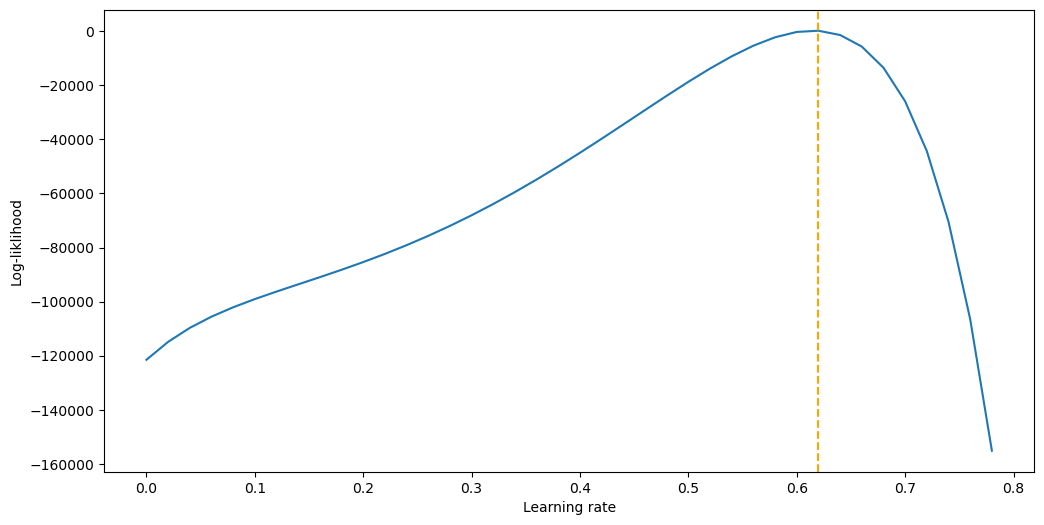

In [18]:
# Exercise 4.2
data = np.load('data.npz')
'''
data['inputs']: numpy array of shape (30, 10, 2)
It contains the observed input features of an object with 2 features from 30 different tasks, each with a length of 10.

data['targets']: numpy array of shape (30, 10)
It contains the corresponding targets (criterion values) for each of the trials.

data['predictions']: numpy array of shape (30, 10)
It contains the predictions made by an agent for each of the trials.
'''
# TODO implement maximum likelihood estimation

learning_rates = np.arange(0,0.8,0.02)


std = 0.1 # Given
log_likli = np.empty(len(learning_rates))


for i, learning_rate in enumerate(learning_rates):

    log_lik = 0 # Initializing log liklihood value for every task

    for task in range(data['inputs'].shape[0]):
        
        model = RescorlaWagner(data['inputs'].shape[2], learning_rate)

        for trial in range(data['inputs'].shape[1]):
            
            input_val =  np.array([[i] for i in data['inputs'][task,trial,:]])
            
            # We make prediction via the model
            prediction = model.predict(input_val)
            
            # We use this prediction to calculate the log likelihood
            log_lik = log_lik + norm.logpdf(x = data['predictions'][task, trial], loc = prediction[0][0], scale = std)  # loc: mean
            
            # The model learns via utilizing the learning rate
            model.learn(input_val, data['targets'][task,[trial]])
            
    log_likli[i] = log_lik



    
max_loglik_ind = np.argmax(log_likli) # Maximum liklihood across all tasks
print("The optimal learning rate for this paradigm is {}".format(learning_rates[max_loglik_ind]))


plt.figure(figsize=(12,6))
plt.plot(learning_rates, log_likli)
plt.axvline(x=learning_rates[max_loglik_ind], linestyle ="--", color = 'orange')
plt.ylabel("Log-liklihood")
plt.xlabel("Learning rate")


### Exercise 4.3

Implement a parameter recovery procedure for the Rescorla-Wagner model. For this, you should generate data-sets using the generate\_data() function with $\alpha \in \{0.1, 0.2, \ldots, 1.0 \}$. Plot the learning rate that was used to generate the data against that obtained from a maximum likelihood estimation. Is the learning rate parameter in the Rescorla-Wagner model recoverable?

Hint: you can assume a normally distributed log-likelihood with a mean given by the Rescorla-Wagner model and a constant standard deviation of 0.1 to measure goodness-of-fit.

In [19]:
'''
Important: if you have replaced the Rescorla-Wagner model above with your own implementation, do not replace the following.
'''

class RescorlaWagnerX():
    def __init__(self, num_inputs, learning_rate):
        self.num_inputs = num_inputs
        self.learning_rate = learning_rate
        
        self.weights = np.zeros((num_inputs, 1))
        
    def predict(self, inputs):
        mean = self.weights.T @ inputs
        return mean 
        
    def learn(self, inputs, targets):
        self.weights = self.weights + self.learning_rate * (targets - self.weights.T @ inputs) * inputs
        
'''
This functions generates data from the Rescorla-Wagner model with a particular learning rate.

Returns: 

data_x: numpy array of shape (30, 10, 2)
It contains the observed input features of an object with 2 features from 30 different tasks, each with a length of 10.

data_y_true: numpy array of shape (30, 10)
It contains the corresponding targets (the feedback about criterion values) for each of the trials.

data_y_pred: numpy array of shape (30, 10)
It contains the predictions made by the Rescorla-Wagner model for each of the trials.
'''

def generate_data(lr, length_tasks=10, num_tasks=30, num_inputs=2, sigma_y=0.1):
    data_x = np.zeros((num_tasks, length_tasks, num_inputs))
    data_y_true = np.zeros((num_tasks, length_tasks))
    data_y_pred = np.zeros((num_tasks, length_tasks))

    for task in range(num_tasks):
        # generate the data
        true_weights = np.random.randn(num_inputs, 1)
        inputs = np.random.randn(length_tasks, num_inputs)
        targets = inputs @ true_weights + sigma_y * np.random.randn(length_tasks, 1)

        # initialize the model
        model = RescorlaWagnerX(num_inputs, learning_rate=lr)

        # iterate over each task    
        for trial in range(length_tasks):
            mean = model.predict(inputs[[trial], :].T)
            
            # store relevant quantities
            data_x[task, trial] = inputs[trial]
            data_y_pred[task, trial] = np.random.normal(mean[0, 0], sigma_y) 
            data_y_true[task, trial] = targets[trial, 0]

            model.learn(inputs[[trial], :].T, targets[[trial], :])
    return data_x, data_y_true, data_y_pred

In [28]:
input_val =  np.array([[i] for i in inputs[task,trial,:]])
inputs.shape

(30, 10, 2)

Text(0.5, 0, 'True LR')

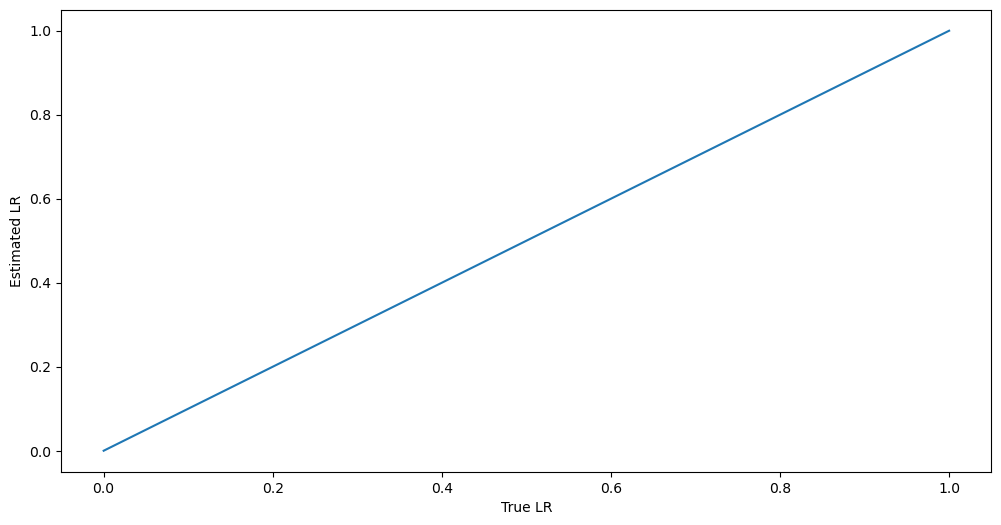

In [29]:
true_lrs = np.linspace(0, 1, 11)
learning_rates = np.linspace(0, 1, 11)

estimated_lrs = np.empty(11)

for counter, true_lr in enumerate(true_lrs):
    inputs, targets, predictions = generate_data(true_lr)
    
    # TODO implement parameter recovery
    std = 0.1 # Given
    log_likli = np.empty(len(learning_rates))

    for i, learning_rate in enumerate(learning_rates):

        log_lik = 0 # Initializing log liklihood value for every task

        for task in range(inputs.shape[0]):

            model = RescorlaWagner(inputs.shape[2], learning_rate)

            for trial in range(inputs.shape[1]):

                input_val =  np.array([[i] for i in inputs[task,trial,:]])

                # We make prediction via the model
                prediction = model.predict(input_val)

                # We use this prediction to calculate the log likelihood
                log_lik = log_lik + norm.logpdf(x = predictions[task, trial], loc = prediction[0][0], scale = std)  # loc: mean

                # The model learns via utilizing the learning rate
                model.learn(input_val, targets[task,[trial]])

        log_likli[i] = log_lik

    estimated_lrs[counter] = learning_rates[np.argmax(log_likli)] # Maximum liklihood across all tasks


plt.figure(figsize=(12,6))
plt.plot(learning_rates, estimated_lrs)
plt.ylabel("Estimated LR")
plt.xlabel("True LR")

### Exercise 4.4

What would you have to change in your code in order to run it on a data-set of choices from our two-alternative forced-choice paradigm (summarize in bullet points)?

Answer:

* Now, we will be having one more dimension in our data, i.e., task*trail*choice*features (in the above case: 30*10*2*2)
* For each trail we have two sub-choices, hence we have to run for loop over choices now and the remaning code can work as earlier

To illustrate this, here is the sample code for this situation:


log_likli = np.empty(len(learning_rates))
for i, learning_rate in enumerate(learning_rates):

    log_lik = 0 # Initializing log liklihood value for every task

    for task in range(inputs.shape[0]):

        model = RescorlaWagner(inputs.shape[3], learning_rate)

        for trial in range(inputs.shape[1]):
        
            for choice in range(inputs.shape[2]):

                input_val =  np.array([[i] for i in inputs[task,trial,choice, :]])

                # We make prediction via the model
                prediction = model.predict(input_val)

                # We use this prediction to calculate the log likelihood
                log_lik = log_lik + norm.logpdf(x = predictions[task, trial, choice], loc = prediction[0][0], scale = std)

                # The model learns via utilizing the learning rate
                model.learn(input_val, targets[task,[trial],[choice]])